# Here we will use ptune learning method as baseline for genre classification

In [1]:
import sys
import os

sys.path.append(os.path.abspath('../'))

In [2]:
import numpy as np

os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
import torch
torch.cuda.empty_cache()
device = 'cuda' if torch.cuda.is_available() else 'cpu'

from transformers import AutoModelForCausalLM, AutoTokenizer

from src.utils import logger, DatasetTypes
from src.data import init_data
from src.ptune import prepare_ptune, train, MultiLabelClassifier
from src.model import get_pretrained
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
import json
import re
# supported files in spython
device

/home/super-pc2/miniconda3/envs/genre-lyrics/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'cuda'

In [3]:
model_name = "Qwen/Qwen3-0.6B"
tokenizer, base_model = get_pretrained(model_name, device)

## Get dataset with all genres and 1,294,054 examples

In [4]:
path_to_csv = '../data/top_genres.csv'
train_dataset, val_dataset, test_dataset , idx2genre, genres, train_loader, val_loader, test_loader = init_data(path_to_csv=path_to_csv, batch_size=16, tokenizer=tokenizer)

In [5]:
peft_model = prepare_ptune(model=base_model, model_name=model_name, genres=genres, device=device)
hidden_size = base_model.config.hidden_size
num_labels = len(genres)
model = MultiLabelClassifier(peft_model, hidden_size, num_labels).to("cuda")

trainable params: 30,720 || all params: 596,080,640 || trainable%: 0.0052


In [6]:
num_epochs = 100
warmup_steps = 500
learning_rate = 1e-4
treshold = 0.3

`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`.
Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.90it/s]


Epoch 1/100 | Train Loss: 0.6385 | Val F1: 0.2018 | P: 0.1284 | R: 0.7500


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.90it/s]


Epoch 2/100 | Train Loss: 0.4069 | Val F1: 0.2105 | P: 0.1359 | R: 0.5066


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.91it/s]


Epoch 3/100 | Train Loss: 0.3234 | Val F1: 0.1863 | P: 0.1243 | R: 0.3868


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.88it/s]


Epoch 4/100 | Train Loss: 0.2956 | Val F1: 0.2035 | P: 0.1384 | R: 0.3996


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.87it/s]


Epoch 5/100 | Train Loss: 0.2815 | Val F1: 0.2234 | P: 0.1539 | R: 0.4235


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.90it/s]


Epoch 6/100 | Train Loss: 0.2562 | Val F1: 0.2869 | P: 0.2633 | R: 0.4964


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.86it/s]


Epoch 7/100 | Train Loss: 0.2431 | Val F1: 0.2351 | P: 0.1661 | R: 0.4242


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.88it/s]


Epoch 8/100 | Train Loss: 0.2306 | Val F1: 0.2264 | P: 0.1833 | R: 0.3808


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.87it/s]


Epoch 9/100 | Train Loss: 0.2150 | Val F1: 0.2755 | P: 0.2405 | R: 0.4272


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.87it/s]


Epoch 10/100 | Train Loss: 0.1995 | Val F1: 0.2668 | P: 0.2053 | R: 0.4298


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.87it/s]


Epoch 11/100 | Train Loss: 0.1905 | Val F1: 0.2648 | P: 0.2015 | R: 0.4254


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.85it/s]


Epoch 12/100 | Train Loss: 0.1756 | Val F1: 0.2731 | P: 0.2160 | R: 0.4527


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.85it/s]


Epoch 13/100 | Train Loss: 0.1596 | Val F1: 0.2429 | P: 0.1888 | R: 0.4180


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.88it/s]


Epoch 14/100 | Train Loss: 0.1452 | Val F1: 0.2416 | P: 0.2021 | R: 0.3673


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.87it/s]


Epoch 15/100 | Train Loss: 0.1357 | Val F1: 0.2575 | P: 0.1987 | R: 0.4033


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.86it/s]


Epoch 16/100 | Train Loss: 0.1359 | Val F1: 0.2685 | P: 0.2017 | R: 0.4255


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.86it/s]


Epoch 17/100 | Train Loss: 0.1150 | Val F1: 0.2611 | P: 0.2038 | R: 0.4070


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.85it/s]


Epoch 18/100 | Train Loss: 0.1073 | Val F1: 0.2434 | P: 0.1970 | R: 0.3634


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.87it/s]


Epoch 19/100 | Train Loss: 0.0932 | Val F1: 0.2846 | P: 0.2699 | R: 0.3771


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.87it/s]


Epoch 20/100 | Train Loss: 0.0856 | Val F1: 0.2409 | P: 0.1794 | R: 0.3789


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.86it/s]


Epoch 21/100 | Train Loss: 0.0728 | Val F1: 0.2602 | P: 0.2148 | R: 0.3744


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.88it/s]


Epoch 22/100 | Train Loss: 0.0684 | Val F1: 0.2611 | P: 0.2260 | R: 0.3353


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.86it/s]


Epoch 23/100 | Train Loss: 0.0595 | Val F1: 0.2486 | P: 0.2097 | R: 0.3491


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.86it/s]


Epoch 24/100 | Train Loss: 0.0526 | Val F1: 0.2553 | P: 0.3094 | R: 0.3155


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.87it/s]


Epoch 25/100 | Train Loss: 0.0485 | Val F1: 0.2571 | P: 0.2164 | R: 0.3267


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.86it/s]


Epoch 26/100 | Train Loss: 0.0440 | Val F1: 0.2271 | P: 0.1929 | R: 0.2924


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.85it/s]


Epoch 27/100 | Train Loss: 0.0390 | Val F1: 0.2255 | P: 0.1950 | R: 0.2796


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.84it/s]


Epoch 28/100 | Train Loss: 0.0385 | Val F1: 0.2404 | P: 0.2220 | R: 0.2908


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.85it/s]


Epoch 29/100 | Train Loss: 0.0308 | Val F1: 0.2543 | P: 0.2481 | R: 0.3223


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.86it/s]


Epoch 30/100 | Train Loss: 0.0260 | Val F1: 0.2180 | P: 0.1814 | R: 0.2824


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.87it/s]


Epoch 31/100 | Train Loss: 0.0232 | Val F1: 0.2664 | P: 0.2695 | R: 0.3184


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.85it/s]


Epoch 32/100 | Train Loss: 0.0196 | Val F1: 0.2517 | P: 0.2679 | R: 0.2763


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.85it/s]


Epoch 33/100 | Train Loss: 0.0285 | Val F1: 0.2260 | P: 0.1883 | R: 0.2937


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.84it/s]


Epoch 34/100 | Train Loss: 0.0139 | Val F1: 0.2155 | P: 0.1826 | R: 0.2659


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.85it/s]


Epoch 35/100 | Train Loss: 0.0124 | Val F1: 0.2333 | P: 0.2375 | R: 0.2753


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.89it/s]


Epoch 36/100 | Train Loss: 0.0134 | Val F1: 0.2137 | P: 0.1836 | R: 0.2568


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.86it/s]


Epoch 37/100 | Train Loss: 0.0134 | Val F1: 0.2119 | P: 0.1972 | R: 0.2365


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.86it/s]


Epoch 38/100 | Train Loss: 0.0120 | Val F1: 0.2076 | P: 0.1796 | R: 0.2464


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.85it/s]


Epoch 39/100 | Train Loss: 0.0150 | Val F1: 0.2039 | P: 0.1787 | R: 0.2384


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.84it/s]


Epoch 40/100 | Train Loss: 0.0105 | Val F1: 0.2561 | P: 0.2454 | R: 0.2921


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.85it/s]


Epoch 41/100 | Train Loss: 0.0064 | Val F1: 0.2072 | P: 0.1827 | R: 0.2414


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.85it/s]


Epoch 42/100 | Train Loss: 0.0049 | Val F1: 0.2075 | P: 0.1829 | R: 0.2417


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.87it/s]


Epoch 43/100 | Train Loss: 0.0067 | Val F1: 0.1952 | P: 0.1745 | R: 0.2225


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.86it/s]


Epoch 44/100 | Train Loss: 0.0048 | Val F1: 0.2034 | P: 0.1846 | R: 0.2282


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.83it/s]


Epoch 45/100 | Train Loss: 0.0030 | Val F1: 0.1969 | P: 0.1750 | R: 0.2263


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.85it/s]


Epoch 46/100 | Train Loss: 0.0042 | Val F1: 0.2191 | P: 0.2220 | R: 0.2336


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.85it/s]


Epoch 47/100 | Train Loss: 0.0028 | Val F1: 0.2482 | P: 0.2595 | R: 0.2591


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.86it/s]


Epoch 48/100 | Train Loss: 0.0022 | Val F1: 0.1968 | P: 0.1838 | R: 0.2141


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.86it/s]


Epoch 49/100 | Train Loss: 0.0024 | Val F1: 0.2088 | P: 0.1874 | R: 0.2364


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.87it/s]


Epoch 50/100 | Train Loss: 0.0018 | Val F1: 0.2012 | P: 0.1822 | R: 0.2251


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.85it/s]


Epoch 51/100 | Train Loss: 0.0011 | Val F1: 0.2112 | P: 0.1938 | R: 0.2333


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.84it/s]


Epoch 52/100 | Train Loss: 0.0014 | Val F1: 0.2287 | P: 0.2283 | R: 0.2471


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.85it/s]


Epoch 53/100 | Train Loss: 0.0018 | Val F1: 0.2004 | P: 0.1858 | R: 0.2191


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.86it/s]


Epoch 54/100 | Train Loss: 0.0011 | Val F1: 0.2055 | P: 0.1916 | R: 0.2222


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.86it/s]


Epoch 55/100 | Train Loss: 0.0011 | Val F1: 0.2148 | P: 0.1936 | R: 0.2430


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.83it/s]


Epoch 56/100 | Train Loss: 0.0011 | Val F1: 0.2052 | P: 0.1846 | R: 0.2326


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.86it/s]


Epoch 57/100 | Train Loss: 0.0009 | Val F1: 0.2186 | P: 0.1996 | R: 0.2424


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.85it/s]


Epoch 58/100 | Train Loss: 0.0009 | Val F1: 0.2075 | P: 0.1901 | R: 0.2288


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.84it/s]


Epoch 59/100 | Train Loss: 0.0009 | Val F1: 0.2268 | P: 0.2292 | R: 0.2411


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.81it/s]


Epoch 60/100 | Train Loss: 0.0007 | Val F1: 0.2099 | P: 0.1913 | R: 0.2359


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.83it/s]


Epoch 61/100 | Train Loss: 0.0009 | Val F1: 0.2040 | P: 0.1903 | R: 0.2213


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.86it/s]


Epoch 62/100 | Train Loss: 0.0005 | Val F1: 0.2267 | P: 0.2203 | R: 0.2426


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.86it/s]


Epoch 63/100 | Train Loss: 0.0006 | Val F1: 0.2118 | P: 0.1984 | R: 0.2283


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.85it/s]


Epoch 64/100 | Train Loss: 0.0005 | Val F1: 0.2257 | P: 0.2230 | R: 0.2362


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.87it/s]


Epoch 65/100 | Train Loss: 0.0005 | Val F1: 0.1988 | P: 0.1810 | R: 0.2213


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.85it/s]


Epoch 66/100 | Train Loss: 0.0005 | Val F1: 0.2002 | P: 0.1823 | R: 0.2229


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.84it/s]


Epoch 67/100 | Train Loss: 0.0004 | Val F1: 0.2305 | P: 0.2260 | R: 0.2435


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.85it/s]


Epoch 68/100 | Train Loss: 0.0005 | Val F1: 0.2021 | P: 0.1857 | R: 0.2222


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.86it/s]


Epoch 69/100 | Train Loss: 0.0005 | Val F1: 0.2306 | P: 0.2337 | R: 0.2428


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.88it/s]


Epoch 70/100 | Train Loss: 0.0005 | Val F1: 0.2371 | P: 0.2408 | R: 0.2483


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.87it/s]


Epoch 71/100 | Train Loss: 0.0004 | Val F1: 0.2107 | P: 0.1971 | R: 0.2269


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.86it/s]


Epoch 72/100 | Train Loss: 0.0005 | Val F1: 0.2059 | P: 0.1902 | R: 0.2251


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.85it/s]


Epoch 73/100 | Train Loss: 0.0004 | Val F1: 0.2121 | P: 0.1953 | R: 0.2333


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.85it/s]


Epoch 74/100 | Train Loss: 0.0004 | Val F1: 0.2002 | P: 0.1873 | R: 0.2156


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.85it/s]


Epoch 75/100 | Train Loss: 0.0003 | Val F1: 0.2057 | P: 0.1944 | R: 0.2184


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.86it/s]


Epoch 76/100 | Train Loss: 0.0004 | Val F1: 0.2087 | P: 0.1986 | R: 0.2207


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.87it/s]


Epoch 77/100 | Train Loss: 0.0004 | Val F1: 0.2076 | P: 0.1929 | R: 0.2251


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.86it/s]


Epoch 78/100 | Train Loss: 0.0004 | Val F1: 0.2022 | P: 0.1885 | R: 0.2184


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.87it/s]


Epoch 79/100 | Train Loss: 0.0003 | Val F1: 0.2248 | P: 0.2316 | R: 0.2326


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.85it/s]


Epoch 80/100 | Train Loss: 0.0003 | Val F1: 0.2083 | P: 0.1948 | R: 0.2244


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.86it/s]


Epoch 81/100 | Train Loss: 0.0003 | Val F1: 0.2027 | P: 0.1897 | R: 0.2177


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.82it/s]


Epoch 82/100 | Train Loss: 0.0003 | Val F1: 0.2019 | P: 0.1860 | R: 0.2213


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.86it/s]


Epoch 83/100 | Train Loss: 0.0004 | Val F1: 0.2283 | P: 0.2314 | R: 0.2405


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.85it/s]


Epoch 84/100 | Train Loss: 0.0003 | Val F1: 0.2163 | P: 0.2130 | R: 0.2274


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.84it/s]


Epoch 85/100 | Train Loss: 0.0003 | Val F1: 0.2062 | P: 0.1890 | R: 0.2272


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.85it/s]


Epoch 86/100 | Train Loss: 0.0003 | Val F1: 0.2078 | P: 0.1937 | R: 0.2251


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.86it/s]


Epoch 87/100 | Train Loss: 0.0003 | Val F1: 0.2343 | P: 0.2396 | R: 0.2440


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.84it/s]


Epoch 88/100 | Train Loss: 0.0003 | Val F1: 0.2056 | P: 0.1911 | R: 0.2234


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.83it/s]


Epoch 89/100 | Train Loss: 0.0003 | Val F1: 0.2047 | P: 0.1954 | R: 0.2153


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.86it/s]


Epoch 90/100 | Train Loss: 0.0003 | Val F1: 0.2060 | P: 0.1913 | R: 0.2241


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.86it/s]


Epoch 91/100 | Train Loss: 0.0003 | Val F1: 0.2014 | P: 0.1865 | R: 0.2196


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.84it/s]


Epoch 92/100 | Train Loss: 0.0003 | Val F1: 0.1985 | P: 0.1842 | R: 0.2156


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.87it/s]


Epoch 93/100 | Train Loss: 0.0003 | Val F1: 0.2239 | P: 0.2180 | R: 0.2384


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.84it/s]


Epoch 94/100 | Train Loss: 0.0003 | Val F1: 0.2036 | P: 0.1894 | R: 0.2206


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.86it/s]


Epoch 95/100 | Train Loss: 0.0003 | Val F1: 0.2260 | P: 0.2228 | R: 0.2376


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.85it/s]


Epoch 96/100 | Train Loss: 0.0003 | Val F1: 0.2008 | P: 0.1864 | R: 0.2177


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.87it/s]


Epoch 97/100 | Train Loss: 0.0003 | Val F1: 0.2034 | P: 0.1884 | R: 0.2213


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.86it/s]


Epoch 98/100 | Train Loss: 0.0003 | Val F1: 0.2038 | P: 0.1910 | R: 0.2191


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.87it/s]


Epoch 99/100 | Train Loss: 0.0003 | Val F1: 0.2070 | P: 0.1910 | R: 0.2272


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.86it/s]


Epoch 100/100 | Train Loss: 0.0003 | Val F1: 0.2075 | P: 0.1922 | R: 0.2263


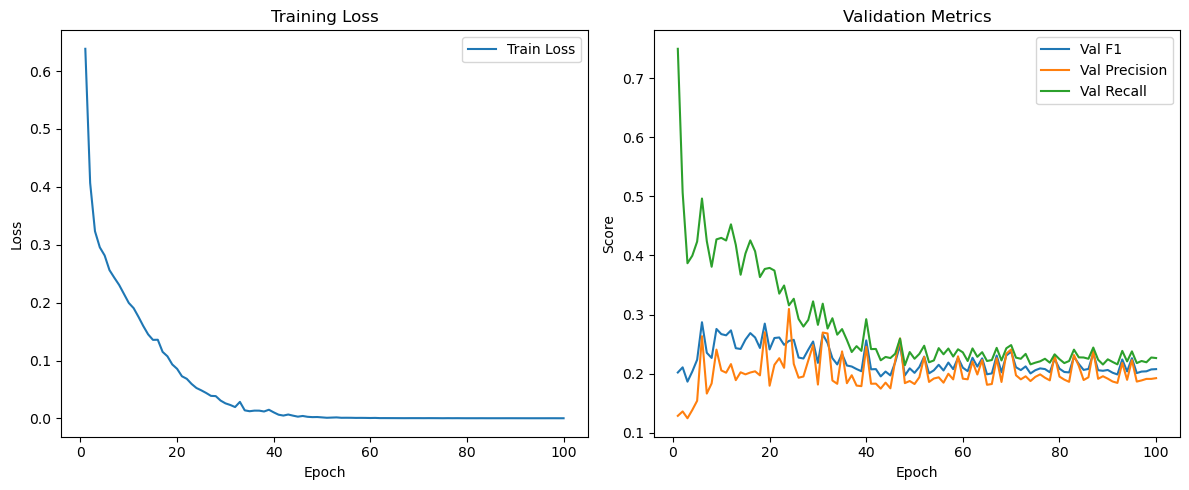

In [7]:
model = train(model=model,
      idx2genre=idx2genre,
      learning_rate=learning_rate,
      num_epochs=num_epochs,
      tokenizer=tokenizer,
      train_loader=train_loader,
      val_loader=val_loader,
      device=device)

In [8]:
model.eval()
threshold = 0.5

print("\nTesting on test set (multi‑label):")
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        true_multilabels = batch['labels']  # [B, num_labels]
        
        # forward через ваш MultiLabelClassifier
        logits = model(input_ids, attention_mask)       # [B, num_labels]
        probs  = torch.sigmoid(logits)                  # [B, num_labels]
        preds  = (probs > threshold).long()             # [B, num_labels]
        
        for i in range(preds.size(0)):
            # собираем списки жанров
            pred_genres = [genres[j] for j, p in enumerate(preds[i]) if p == 1]
            true_genres = [genres[j] for j, t in enumerate(true_multilabels[i]) if t == 1]
            
            pred_str = ", ".join(pred_genres) if pred_genres else "None"
            true_str = ", ".join(true_genres) if true_genres else "None"
            print(f"Predicted genres: {pred_str:<30} | Actual genres: {true_str}")




Testing on test set (multi‑label):
Predicted genres: None                           | Actual genres: r&b
Predicted genres: pop                            | Actual genres: country
Predicted genres: hip-hop                        | Actual genres: hip-hop
Predicted genres: rock                           | Actual genres: rock
Predicted genres: pop                            | Actual genres: pop
Predicted genres: pop                            | Actual genres: pop
Predicted genres: pop                            | Actual genres: hip-hop
Predicted genres: hip-hop                        | Actual genres: hip-hop
Predicted genres: pop                            | Actual genres: electronic, pop
Predicted genres: None                           | Actual genres: pop
Predicted genres: None                           | Actual genres: pop
Predicted genres: hip-hop                        | Actual genres: hip-hop
Predicted genres: None                           | Actual genres: hip-hop
Predicted genres: